# 1. Preparation

## 1.1. Library Upload

In [46]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Uploading Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn
import xgboost as xgb
import tensorflow as tf
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from folium.plugins import HeatMap

## 1.2. Data Upload

In [48]:
# Uploading the dataset
data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')
data

C:\Users\ahska\AppData\Local\Temp\ipykernel_19260\3319388646.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,PAST SALE,April-21-2020,Single Family Residential,7135 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",950000,4,...,1.200146,2.399690,1.506827,3.583604,2.246205,0.496974,4.826767,0.641446,2.702233,6.853520
16660,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16661,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16662,PAST SALE,November-9-2022,Single Family Residential,8150 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",1150000,4,...,0.875637,4.332201,2.193801,4.861157,0.999305,0.446238,3.915165,0.612154,2.545826,9.123077


# 2. Data Preprocessing

## 2.1. Data Check

In [49]:
# Displaying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [50]:
# Checking for null values/missing values
data.isnull().sum()

SALE TYPE                                  0
SOLD DATE                               2917
PROPERTY TYPE                              0
ADDRESS                                    0
CITY                                       0
STATE OR PROVINCE                          0
ZIP OR POSTAL CODE                         0
NEIGHBORHOOD                               0
PRICE                                      0
BEDS                                       0
BATHS                                      0
LOCATION                                   0
SQUARE FEET                                0
LOT SIZE                                2610
YEAR BUILT                                 0
DAYS ON MARKET                         14155
$/SQUARE FEET                              0
HOA/MONTH                              12109
STATUS                                  1017
NEXT OPEN HOUSE START TIME             16254
NEXT OPEN HOUSE END TIME               16254
URL                                        0
SOURCE    

In [51]:
columns_to_drop = ['SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 
                   'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 
                   'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 
                   'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long']

# Drop columns that exist in the DataFrame
data_check = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [52]:
# Checking the statistics of the data
data_check.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,gas_station_accessibility,parking_accessibility,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
count,1.666400e+04,16664.00000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,...,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000
mean,1.204680e+06,3.06325,2.285241,1943.243639,1972.158125,1.193679,13.715487,0.062136,21.232271,0.005389,...,5.151770,9.039253,5.808909,26.027815,3.625721,1.742096,5.111753,0.477210,4.854828,23.638285
std,1.463403e+06,1.28549,1.047168,1075.379249,39.464822,0.914335,37.208423,0.225246,11.841349,0.050845,...,9.341222,13.564628,5.094240,39.461253,5.388173,5.627861,3.778865,0.589981,5.017696,20.534118
min,6.170600e+04,1.00000,1.000000,142.000000,1889.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.270000e+05,2.00000,2.000000,1220.000000,1940.000000,0.394569,1.187634,0.000000,14.381177,0.000000,...,0.735626,2.620514,1.967434,6.526101,0.768549,0.000000,2.216129,0.078605,1.943787,9.092470
50%,8.850000e+05,3.00000,2.000000,1720.000000,1973.000000,1.087226,3.061848,0.000000,20.179976,0.000000,...,2.180284,5.126611,4.575636,14.473039,1.964593,0.255883,4.539812,0.359653,3.407789,19.107166
75%,1.295500e+06,4.00000,3.000000,2410.000000,2011.000000,1.873552,7.709890,0.000000,24.519093,0.000000,...,5.127719,8.961904,8.200062,27.064461,4.302296,0.953896,6.947047,0.653980,5.559859,32.117487
max,6.710000e+07,22.00000,23.000000,20587.000000,2025.000000,3.940469,259.771887,3.326475,87.113944,0.885319,...,66.753270,101.198643,28.019075,277.198990,41.163393,62.243117,20.745593,4.827632,34.491707,126.337807


## 2.2. Feature Engineering

### 2.2.1. "Year Built" Feature Transformation

In [53]:
# Creating 'age' as a new variable by extracting it from the 'yr_built' variable
data.rename(columns={'YEAR BUILT':'AGE'},inplace=True)
data['AGE'] = 2024 - data['AGE']

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [55]:
# Ensuring conversion of categorical variable is successful
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


## 2.3. Data Variations & Splitting

### 2.3.1. Version 1 - Scaling for All Features

In [56]:
# Creating a new version of the dataset
data_1 = data.copy()

In [57]:
data_1.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


In [58]:
# Selecting numerical columns (excluding target variable 'price')
features_1 = data_1.drop(columns=['SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'])
numerical_features_1 = features_1.select_dtypes(include=['number']).columns

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_1[numerical_features_1] = scaler.fit_transform(data_1[numerical_features_1])

#### Data Splitting

In [59]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    data_1.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_1['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.2. Version 2 - Scaling for All Feature & Adding Dummy Variable

In [60]:
# Creating a new version of the dataset
data_2 = data.copy()

In [61]:
data_2.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


##### Dummy Variable

In [62]:
import pandas as pd

# Assuming 'data_1' is your original DataFrame and 'PROPERTY TYPE' is the categorical column
# Create dummy variables
dummies_2 = pd.get_dummies(data_2['PROPERTY TYPE'], prefix='PROPERTY_TYPE')


# If for some reason the dummies are not in the format you want, you can convert them to int
dummies_2 = dummies_2.astype(int)



# Concatenate the dummy variables with the original DataFrame
data_2 = pd.concat([data_2, dummies_2], axis=1)

# Now 'data_1' has both the original 'PROPERTY TYPE' column and the new dummy variables


##### Data Splitting

In [63]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    data_2.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_2['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.3. Version 3 - Scaling for All Excluding Price

In [64]:
# Creating a new version of the dataset
data_3 = data.copy()

In [65]:
data_3.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


In [66]:
# Selecting numerical columns (excluding target variable 'price')
features_3 = data_3.drop(columns=['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'])
numerical_features_3 = features_3.select_dtypes(include=['number']).columns

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_3[numerical_features_3] = scaler.fit_transform(data_3[numerical_features_3])

##### Data Splitting

In [89]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    data_3.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_3['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.4. Version 4 - Scaling for All Excluding Price & Include Dummy

In [108]:
# Creating a new version of the dataset
data_4 = data.copy()

In [109]:
data_4.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


In [110]:
# selecting numerical columns (excluding target variable 'price')
features_4 = data_4.drop(columns=['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'])
numerical_features_4 = features_4.select_dtypes(include=['number']).columns

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_4[numerical_features_4] = scaler.fit_transform(data_4[numerical_features_4])

##### Dummy Variable

In [111]:
import pandas as pd

# Assuming 'data_1' is your original DataFrame and 'PROPERTY TYPE' is the categorical column
# Create dummy variables
dummies_4 = pd.get_dummies(data_4['PROPERTY TYPE'], prefix='PROPERTY_TYPE')


# If for some reason the dummies are not in the format you want, you can convert them to int
dummies_4 = dummies_4.astype(int)



# Concatenate the dummy variables with the original DataFrame
data_4 = pd.concat([data_4, dummies_4], axis=1)

# Now 'data_1' has both the original 'PROPERTY TYPE' column and the new dummy variables


In [113]:
data_4.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_Mobile/Manufactured Home,PROPERTY_TYPE_Multi-Family (2-4 Unit),PROPERTY_TYPE_Multi-Family (5+ Unit),PROPERTY_TYPE_Other,PROPERTY_TYPE_Single Family Residential,PROPERTY_TYPE_Townhouse
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,-0.827142,...,0.876275,-0.535277,-0.665489,0,0,0,0,0,1,0
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,0.728732,...,0.289577,-0.808635,-1.114022,0,0,0,0,0,1,0
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,0.728732,...,-0.477319,-0.709297,-0.945647,0,0,0,0,0,1,0
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,1.506669,...,0.534465,-0.803136,-1.038493,0,0,0,0,0,1,0
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,1.506669,...,0.622617,-0.825654,-1.107864,0,0,0,0,0,1,0


##### Data Splitting

In [112]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    data_4.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_4['PRICE'],
    test_size=0.3,
    random_state=10
)

# 3. Running the Model

## 3.1. Version 1

### 3.1.1. RandomForest Model (RF)

#### 3.1.1.1. Baseline Model

In [16]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_1 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_1 = rf_model_1.fit(X_train_1, y_train_1)

# Predict on the test set
test_rf_pred_1 = rf_model_1.predict(X_test_1)


In [17]:
# Calculate evaluation metrics
test_mse_rf_1 = mean_squared_error(y_test_1, test_rf_pred_1)
test_rmse_rf_1 = np.sqrt(test_mse_rf_1)
test_mae_rf_1 = mean_absolute_error(y_test_1, test_rf_pred_1)
test_r2_rf_1 = r2_score(y_test_1, test_rf_pred_1)

print(f"Mean Squared Error: {test_mse_rf_1}")
print(f"Root Mean Squared Error: {test_rmse_rf_1}")
print(f"Root Mean Squared Error: {test_mae_rf_1}")
print(f"R² Score: {test_r2_rf_1}")

Mean Squared Error: 0.21415066724149948
Root Mean Squared Error: 0.4627641594176233
Root Mean Squared Error: 0.12429737728750898
R² Score: 0.7613788251558419


#### 3.1.3.2. Cross-Validation Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score_rfcv_1(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer_rfcv_1 = make_scorer(rmse_score_rfcv_1, greater_is_better=False)

# Cross-validate the model using RMSE
train_rmse_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring=rmse_scorer_rfcv_1)

# Cross-validate the model using Mean Absolute Error
train_mae_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='neg_mean_absolute_error')

# Cross-validate the model using R^2
train_r2_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='r2')


In [19]:
# Print cross-validation results
print("CV RMSE scores:", -train_rmse_rf_cv_1)  # Negate RMSE scores because make_scorer(mse, greater_is_better=False) makes them negative
print("CV RMSE average score:", -np.mean(train_rmse_rf_cv_1))

print("CV R^2 scores:", -train_mae_rf_cv_1)
print("CV R^2 average score:", np.mean(train_mae_rf_cv_1))

print("CV R^2 scores:", train_r2_rf_cv_1)
print("CV R^2 average score:", np.mean(train_r2_rf_cv_1))

CV RMSE scores: [0.43900781 0.54705799 0.35006506 0.73841586 0.53696405]
CV RMSE average score: 0.522302152241193
CV R^2 scores: [0.13689404 0.13456605 0.11542553 0.14108208 0.13329695]
CV R^2 average score: -0.13225292902684258
CV R^2 scores: [0.73390111 0.82173828 0.82437145 0.67760713 0.32239616]
CV R^2 average score: 0.6760028277267337


#### 3.1.1.3. Hyperparameter Tuning

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_1 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_1 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_1 = GridSearchCV(estimator=rfgs_model_1, param_grid=param_grid_rfgs_1, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_1.fit(X_train_1, y_train_1)

# Get the best estimator
best_rfgs_model_1 = grid_search_rf_1.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_1 = best_rfgs_model_1.predict(X_test_1)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
681 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [21]:
# Calculate evaluation metrics
test_mse_rfgs_1 = mean_squared_error(y_test_1, test_rfgs_pred_1)
test_rmse_rfgs_1 = np.sqrt(test_mse_rfgs_1)
test_mae_rfgs_1 = mean_absolute_error(y_test_1, test_rfgs_pred_1)
test_r2_rfgs_1 = r2_score(y_test_1, test_rfgs_pred_1)

# Print the results
print("Best model parameters:", grid_search_rf_1.best_params_)
print(f"Test MSE: {test_mse_rfgs_1}")
print(f"Test RMSE: {test_rmse_rfgs_1}")
print(f"Test MAE: {test_mae_rfgs_1}")
print(f"Test R² Score: {test_r2_rfgs_1}")

Best model parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test MSE: 0.23277456805505803
Test RMSE: 0.48246716785192545
Test MAE: 0.10795480212736602
Test R² Score: 0.7406268137352993


### 3.1.2. Model Evaluation

#### 3.1.2.1. Model Comparison

In [79]:
# Displaying the comparison through a table

rf_comparison_1 = {
    'Model': ['V1 Random Forest Baseline Model', 'V1 Random Forest with GridSearch'],
    'Model Object': [rf_model_1, best_rfgs_model_1],
    'RMSE': [test_rmse_rf_1, test_rmse_rfgs_1],
    'MAE': [test_mae_rf_1, test_mae_rfgs_1],
    'R-Squared Score': [test_r2_rf_1, test_r2_rfgs_1]
}

rf_comparison_1 = pd.DataFrame(rf_comparison_1)

rf_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V1 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",0.462764,0.124297,0.761379
1,V1 Random Forest with GridSearch,"(DecisionTreeRegressor(max_features='sqrt', ra...",0.482467,0.107955,0.740627


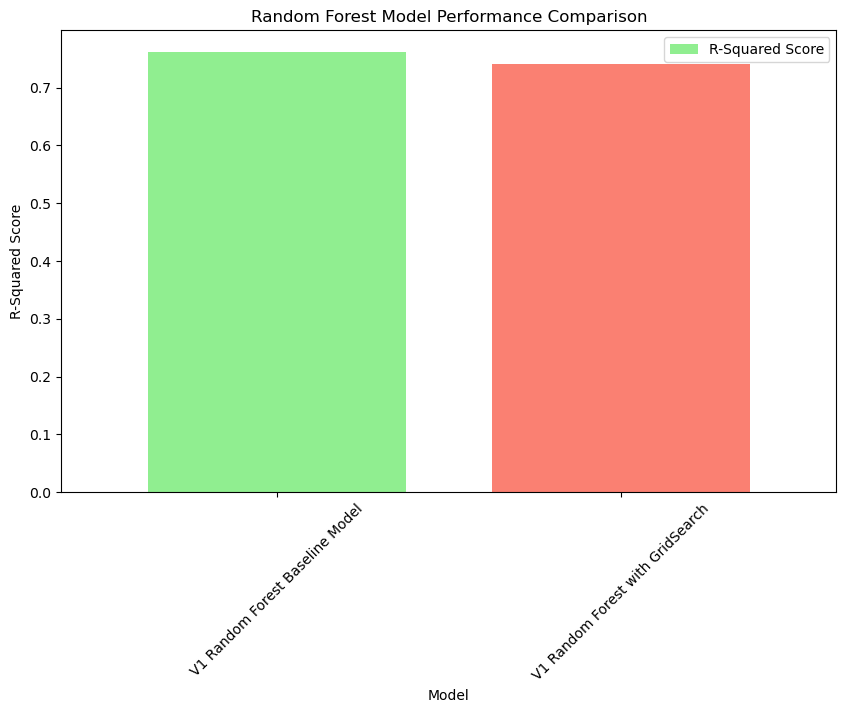

In [80]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_1 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_1, ax_rf_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_1 = rf_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_1,  # Apply different colors
    ax=ax_rf_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_1.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_1.set_xticklabels(ax_rf_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_1, labels_rf_1 = ax_rf_1.get_legend_handles_labels()
ax_rf_1.legend(lines_rf_1, labels_rf_1)

# Show the plot
plt.show()

#### 3.1.2.2. Choosing the Best Model

In [81]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_1 = rf_comparison_1.iloc[0]['Model']
best_rf_model_1 = rf_comparison_1.iloc[0]['Model Object']
best_rf_r2_score_1 = rf_comparison_1.iloc[0]['R-Squared Score']
best_rf_rmse_1 = rf_comparison_1.iloc[0]['RMSE']
best_rf_mae_1 = rf_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_1 = best_rf_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_1)
print("The highest R-Squared Score is:", best_rf_r2_score_1)
print("The best RMSE is:", best_rf_rmse_1)
print("The best MAE is:", best_rf_mae_1)

The best model based on R-Squared Score is: V1 Random Forest Baseline Model
The highest R-Squared Score is: 0.7613788251558419
The best RMSE is: 0.4627641594176233
The best MAE is: 0.12429737728750898


## 3.2. Version 2

### 3.2.1. Random Forest (RF) Model

#### 3.2.1.1. Baseline Model

In [37]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_2 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_2 = rf_model_2.fit(X_train_2, y_train_2)

# Predict on the test set
test_rf_pred_2 = rf_model_2.predict(X_test_2)


In [70]:
# Calculate evaluation metrics
test_mse_rf_2 = mean_squared_error(y_test_2, test_rf_pred_2)
test_rmse_rf_2 = np.sqrt(test_mse_rf_2)
test_mae_rf_2 = mean_absolute_error(y_test_2, test_rf_pred_2)
test_r2_rf_2 = r2_score(y_test_2, test_rf_pred_2)

print(f"Mean Squared Error: {test_mse_rf_2}")
print(f"Root Mean Squared Error: {test_rmse_rf_2}")
print(f"Root Mean Squared Error: {test_mae_rf_2}")
print(f"R² Score: {test_r2_rf_2}")

Mean Squared Error: 461079913070.9711
Root Mean Squared Error: 679028.6540868295
Root Mean Squared Error: 180840.7537685254
R² Score: 0.7600815325536517


#### 3.2.1.2. Hyperparameter Tuning (with GridSearch)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_2 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_2 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_2 = GridSearchCV(estimator=rfgs_model_2, param_grid=param_grid_rfgs_2, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_2.fit(X_train_2, y_train_2)

# Get the best estimator
best_rfgs_model_2 = grid_search_rf_2.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_2 = best_rfgs_model_2.predict(X_test_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
557 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [40]:
# Calculate evaluation metrics
test_mse_rfgs_2 = mean_squared_error(y_test_2, test_rfgs_pred_2)
test_rmse_rfgs_2 = np.sqrt(test_mse_rfgs_2)
test_mae_rfgs_2 = mean_absolute_error(y_test_2, test_rfgs_pred_2)
test_r2_rfgs_2 = r2_score(y_test_2, test_rfgs_pred_2)

# Print the results
print("Best model parameters:", grid_search_rf_2.best_params_)
print(f"Test MSE: {test_mse_rfgs_2}")
print(f"Test RMSE: {test_rmse_rfgs_2}")
print(f"Test MAE: {test_mae_rfgs_2}")
print(f"Test R² Score: {test_r2_rfgs_2}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 472527750685.2536
Test RMSE: 687406.5396002962
Test MAE: 155915.56595137043
Test R² Score: 0.7541247611174375


### 3.2.2. Model Evaluation

#### 3.2.2.1. Model Comparison

In [82]:
# Displaying the comparison through a table

rf_comparison_2 = {
    'Model': ['V2 Random Forest Baseline Model', 'V2 Random Forest with GridSearch'],
    'Model Object': [rf_model_2, best_rfgs_model_2],
    'RMSE': [test_rmse_rf_2, test_rmse_rfgs_2],
    'MAE': [test_mae_rf_2, test_mae_rfgs_2],
    'R-Squared Score': [test_r2_rf_2, test_r2_rfgs_2]
}

rf_comparison_2 = pd.DataFrame(rf_comparison_2)

rf_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V2 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",679028.654087,180840.753769,0.760082
1,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",687406.539600,155915.565951,0.754125


In [ ]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_2 = rf_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_2 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_2, ax_rf_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_2 = rf_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_2,  # Apply different colors
    ax=ax_rf_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_2.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_2.set_xticklabels(ax_rf_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_2, labels_rf_2 = ax_rf_2.get_legend_handles_labels()
ax_rf_2.legend(lines_rf_2, labels_rf_2)

# Show the plot
plt.show()

#### 3.2.2.2. Choosing the Best Model

In [84]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_2 = rf_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_2 = rf_comparison_2.iloc[0]['Model']
best_rf_model_2 = rf_comparison_2.iloc[0]['Model Object']
best_rf_r2_score_2 = rf_comparison_2.iloc[0]['R-Squared Score']
best_rf_rmse_2 = rf_comparison_2.iloc[0]['RMSE']
best_rf_mae_2 = rf_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_2 = best_rf_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_2)
print("The highest R-Squared Score is:", best_rf_r2_score_2)
print("The best RMSE is:", best_rf_rmse_2)
print("The best MAE is:", best_rf_mae_2)

The best model based on R-Squared Score is: V2 Random Forest Baseline Model
The highest R-Squared Score is: 0.7600815325536517
The best RMSE is: 679028.6540868295
The best MAE is: 180840.7537685254


## 3.3. Version 3

### 3.3.1. Random Forest (RF) Model

#### 3.3.1.1. Baseline Model

In [98]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_3 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_3 = rf_model_3.fit(X_train_3, y_train_3)

# Predict on the test set
test_rf_pred_3 = rf_model_3.predict(X_test_3)


In [99]:
# Calculate evaluation metrics
test_mse_rf_3 = mean_squared_error(y_test_3, test_rf_pred_3)
test_rmse_rf_3 = np.sqrt(test_mse_rf_3)
test_mae_rf_3 = mean_absolute_error(y_test_3, test_rf_pred_3)
test_r2_rf_3 = r2_score(y_test_3, test_rf_pred_3)

print(f"Mean Squared Error: {test_mse_rf_3}")
print(f"Root Mean Squared Error: {test_rmse_rf_3}")
print(f"Root Mean Squared Error: {test_mae_rf_3}")
print(f"R² Score: {test_r2_rf_3}")

Mean Squared Error: 477029073920.2664
Root Mean Squared Error: 690672.9138458135
Root Mean Squared Error: 183040.14800249634
R² Score: 0.7517825411650826


#### 3.3.1.2. Hyperparameter Tuning (with GridSearch)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_3 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_3 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_3 = GridSearchCV(estimator=rfgs_model_3, param_grid=param_grid_rfgs_3, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_3.fit(X_train_3, y_train_3)

# Get the best estimator
best_rfgs_model_3 = grid_search_rf_3.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_3 = best_rfgs_model_3.predict(X_test_3)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
535 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [101]:
# Calculate evaluation metrics
test_mse_rfgs_3 = mean_squared_error(y_test_3, test_rfgs_pred_3)
test_rmse_rfgs_3 = np.sqrt(test_mse_rfgs_3)
test_mae_rfgs_3 = mean_absolute_error(y_test_3, test_rfgs_pred_3)
test_r2_rfgs_3 = r2_score(y_test_3, test_rfgs_pred_3)

# Print the results
print("Best model parameters:", grid_search_rf_2.best_params_)
print(f"Test MSE: {test_mse_rfgs_3}")
print(f"Test RMSE: {test_rmse_rfgs_3}")
print(f"Test MAE: {test_mae_rfgs_3}")
print(f"Test R² Score: {test_r2_rfgs_3}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 471631627962.0966
Test RMSE: 686754.4160484857
Test MAE: 159371.31234053636
Test R² Score: 0.7545910498979478


### 3.3.2. Model Evaluation

#### 3.3.2.1. Model Comparison

In [102]:
# Displaying the comparison through a table

rf_comparison_3 = {
    'Model': ['V3 Random Forest Baseline Model', 'V3 Random Forest with GridSearch'],
    'Model Object': [rf_model_3, best_rfgs_model_3],
    'RMSE': [test_rmse_rf_3, test_rmse_rfgs_3],
    'MAE': [test_mae_rf_3, test_mae_rfgs_3],
    'R-Squared Score': [test_r2_rf_3, test_r2_rfgs_3]
}

rf_comparison_3 = pd.DataFrame(rf_comparison_3)

rf_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_features='sqrt', ra...",686754.416048,159371.312341,0.754591
0,V3 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",690672.913846,183040.148002,0.751783


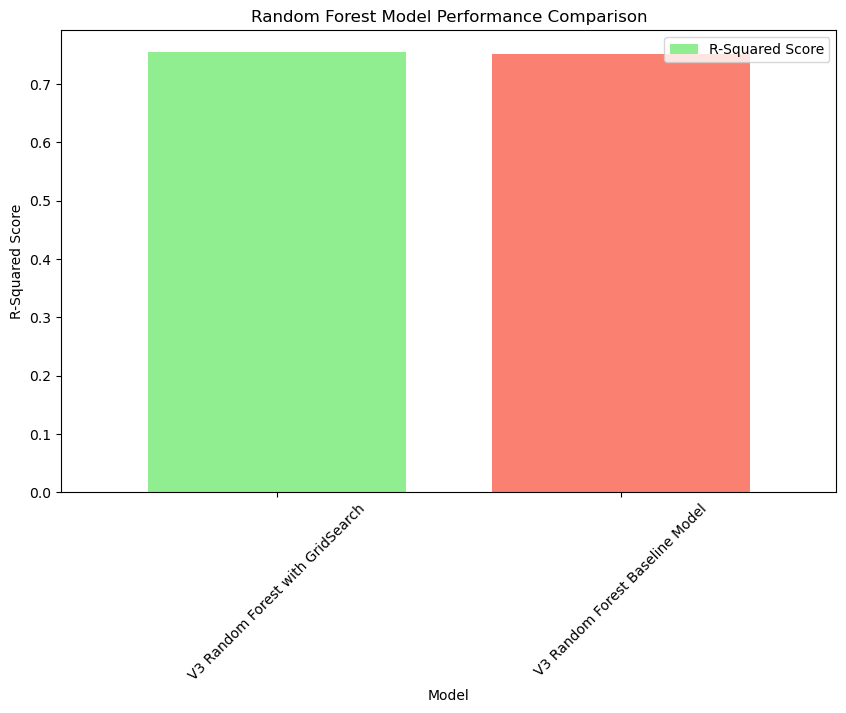

In [103]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_3 = rf_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_3 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_3, ax_rf_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_3 = rf_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_3,  # Apply different colors
    ax=ax_rf_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_3.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_3.set_xticklabels(ax_rf_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_3, labels_rf_3 = ax_rf_3.get_legend_handles_labels()
ax_rf_3.legend(lines_rf_3, labels_rf_3)

# Show the plot
plt.show()

#### 3.3.2.2. Choosing the Best Model

In [104]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_3 = rf_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_3 = rf_comparison_3.iloc[0]['Model']
best_rf_model_3 = rf_comparison_3.iloc[0]['Model Object']
best_rf_r2_score_3 = rf_comparison_3.iloc[0]['R-Squared Score']
best_rf_rmse_3 = rf_comparison_3.iloc[0]['RMSE']
best_rf_mae_3 = rf_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_3 = best_rf_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_3)
print("The highest R-Squared Score is:", best_rf_r2_score_3)
print("The best RMSE is:", best_rf_rmse_3)
print("The best MAE is:", best_rf_mae_3)

The best model based on R-Squared Score is: V3 Random Forest with GridSearch
The highest R-Squared Score is: 0.7545910498979478
The best RMSE is: 686754.4160484857
The best MAE is: 159371.31234053636


## 3.4. Version 4

### 3.4.1. Random Forest (RF) Model

#### 3.4.1.1. Baseline Model

In [114]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_4 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_4 = rf_model_4.fit(X_train_4, y_train_4)

# Predict on the test set
test_rf_pred_4 = rf_model_4.predict(X_test_4)


In [115]:
# Calculate evaluation metrics
test_mse_rf_4 = mean_squared_error(y_test_4, test_rf_pred_4)
test_rmse_rf_4 = np.sqrt(test_mse_rf_4)
test_mae_rf_4 = mean_absolute_error(y_test_4, test_rf_pred_4)
test_r2_rf_4 = r2_score(y_test_4, test_rf_pred_4)

print(f"Mean Squared Error: {test_mse_rf_4}")
print(f"Root Mean Squared Error: {test_rmse_rf_4}")
print(f"Root Mean Squared Error: {test_mae_rf_4}")
print(f"R² Score: {test_r2_rf_4}")

Mean Squared Error: 457649682582.6596
Root Mean Squared Error: 676498.1024235468
Root Mean Squared Error: 180600.13362668094
R² Score: 0.7618664197682391


#### 3.4.1.2. Hyperparameter Tuning (with GridSearch)

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_4 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_4 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_4 = GridSearchCV(estimator=rfgs_model_4, param_grid=param_grid_rfgs_4, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_4.fit(X_train_4, y_train_4)

# Get the best estimator
best_rfgs_model_4 = grid_search_rf_4.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_4 = best_rfgs_model_4.predict(X_test_4)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
505 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [117]:
# Calculate evaluation metrics
test_mse_rfgs_4 = mean_squared_error(y_test_4, test_rfgs_pred_4)
test_rmse_rfgs_4 = np.sqrt(test_mse_rfgs_4)
test_mae_rfgs_4 = mean_absolute_error(y_test_4, test_rfgs_pred_4)
test_r2_rfgs_4 = r2_score(y_test_4, test_rfgs_pred_4)

# Print the results
print("Best model parameters:", grid_search_rf_2.best_params_)
print(f"Test MSE: {test_mse_rfgs_4}")
print(f"Test RMSE: {test_rmse_rfgs_4}")
print(f"Test MAE: {test_mae_rfgs_4}")
print(f"Test R² Score: {test_r2_rfgs_4}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 477814163791.0138
Test RMSE: 691241.0316170574
Test MAE: 164817.09542659565
Test R² Score: 0.7513740272540279


### 3.4.2. Model Evaluation

#### 3.4.2.1. Model Comparison

In [118]:
# Displaying the comparison through a table

rf_comparison_4 = {
    'Model': ['V4 Random Forest Baseline Model', 'V4 Random Forest with GridSearch'],
    'Model Object': [rf_model_4, best_rfgs_model_4],
    'RMSE': [test_rmse_rf_4, test_rmse_rfgs_4],
    'MAE': [test_mae_rf_4, test_mae_rfgs_4],
    'R-Squared Score': [test_r2_rf_4, test_r2_rfgs_4]
}

rf_comparison_4 = pd.DataFrame(rf_comparison_4)

rf_comparison_4.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V4 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",676498.102424,180600.133627,0.761866
1,V4 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=20, max_featu...",691241.031617,164817.095427,0.751374


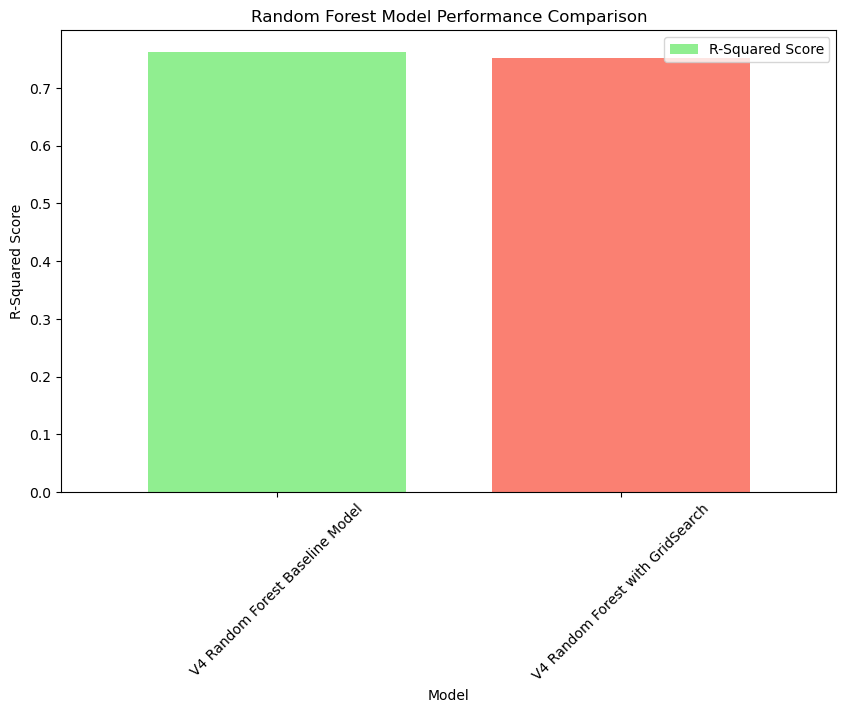

In [119]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_4 = rf_comparison_4.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_4 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_4, ax_rf_4 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_4 = rf_comparison_4.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_4,  # Apply different colors
    ax=ax_rf_4,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_4.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_4.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_4.set_xticklabels(ax_rf_4.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_4, labels_rf_4 = ax_rf_4.get_legend_handles_labels()
ax_rf_4.legend(lines_rf_4, labels_rf_4)

# Show the plot
plt.show()

#### 3.4.2.2. Choosing the Best Model

In [120]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_4 = rf_comparison_4.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_4 = rf_comparison_4.iloc[0]['Model']
best_rf_model_4 = rf_comparison_4.iloc[0]['Model Object']
best_rf_r2_score_4 = rf_comparison_4.iloc[0]['R-Squared Score']
best_rf_rmse_4 = rf_comparison_4.iloc[0]['RMSE']
best_rf_mae_4 = rf_comparison_4.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_4 = best_rf_model_name_4

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_4)
print("The highest R-Squared Score is:", best_rf_r2_score_4)
print("The best RMSE is:", best_rf_rmse_4)
print("The best MAE is:", best_rf_mae_4)

The best model based on R-Squared Score is: V4 Random Forest Baseline Model
The highest R-Squared Score is: 0.7618664197682391
The best RMSE is: 676498.1024235468
The best MAE is: 180600.13362668094


In [126]:
# V4 is Scaling for All Excluding Price & Include Dummy

# 4. Version Comparison

##### Model Comparisons

In [121]:
all_model = pd.concat([rf_comparison_1,
                       rf_comparison_2,
                       rf_comparison_3,
                       rf_comparison_4], ignore_index=True)

all_model = all_model.sort_values('R-Squared Score', ascending=False)

all_model

,Model,Model Object,RMSE,MAE,R-Squared Score
6,V4 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",676498.102424,180600.133627,0.761866
0,V1 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",0.462764,0.124297,0.761379
2,V2 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",679028.654087,180840.753769,0.760082
4,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_features='sqrt', ra...",686754.416048,159371.312341,0.754591
3,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",687406.539600,155915.565951,0.754125
5,V3 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",690672.913846,183040.148002,0.751783
7,V4 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=20, max_featu...",691241.031617,164817.095427,0.751374
1,V1 Random Forest with GridSearch,"(DecisionTreeRegressor(max_features='sqrt', ra...",0.482467,0.107955,0.740627


##### Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


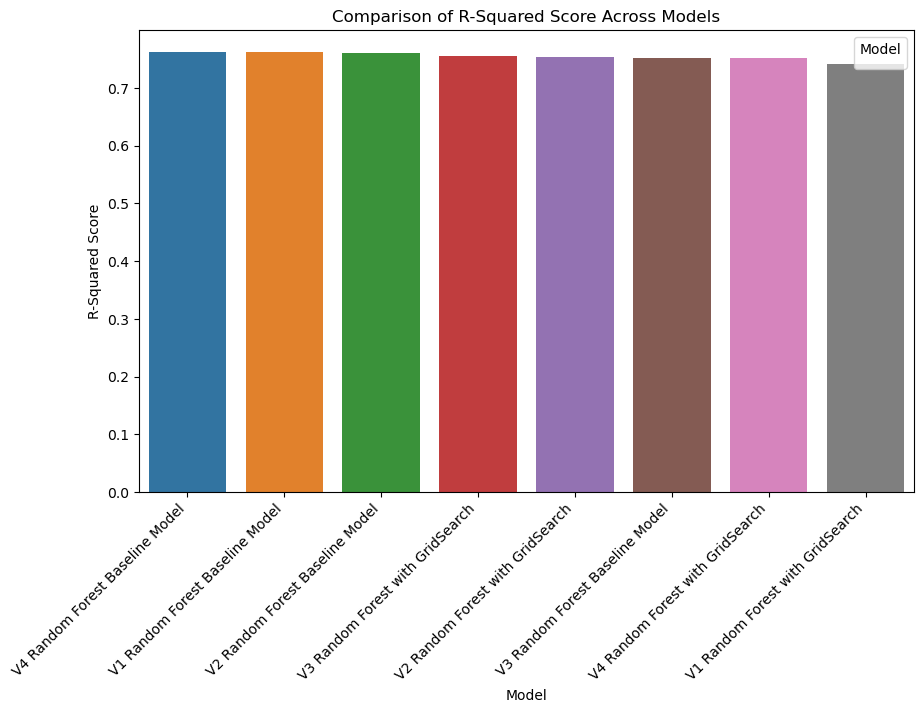

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_model, ax_model = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=all_model, ax=ax_model)
ax_model.set_title('Comparison of R-Squared Score Across Models')
ax_model.set_ylabel('R-Squared Score')
ax_model.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_model.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_model.set_xticklabels(ax_model.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


##### Average Performance

In [123]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse = all_model['RMSE'].mean()
average_mae = all_model['MAE'].mean()
average_r_squared = all_model['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse:.4f}")
print(f"Average MAE: {average_mae:.4f}")
print(f"Average R-Squared Score: {average_r_squared:.4f}")

Average RMSE: 513950.3254
Average MAE: 128073.1552
Average R-Squared Score: 0.7545


##### Choosing the Best Model

In [124]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
all_model = all_model.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name = all_model.iloc[0]['Model']
best_rf_model = all_model.iloc[0]['Model Object']
best_rf_r2_score = all_model.iloc[0]['R-Squared Score']
best_rf_rmse = all_model.iloc[0]['RMSE']
best_rf_mae = all_model.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf = best_rf_model_name

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf)
print("The highest R-Squared Score is:", best_rf_r2_score)
print("The best RMSE is:", best_rf_rmse)
print("The best MAE is:", best_rf_mae)

The best model based on R-Squared Score is: V4 Random Forest Baseline Model
The highest R-Squared Score is: 0.7618664197682391
The best RMSE is: 676498.1024235468
The best MAE is: 180600.13362668094


# 5. Feature Importance

In [128]:
# We choose the model with the highest R-Squared

# Feature importance
feature_importance = best_rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train_4.columns, 'Importance': feature_importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

                                    Feature    Importance
2                               SQUARE FEET  5.494496e-01
7                 bus_station_accessibility  7.349763e-02
0                                      BEDS  6.266741e-02
1                                     BATHS  5.140517e-02
15                     school_accessibility  4.194896e-02
20                       park_accessibility  2.814505e-02
5                     parking_accessibility  2.029852e-02
11            transit_station_accessibility  1.716957e-02
3                                       AGE  1.680721e-02
4                 gas_station_accessibility  1.519448e-02
13                    library_accessibility  1.485763e-02
27          places_of_worship_accessibility  1.462222e-02
14                  preschool_accessibility  1.059846e-02
28                     safety_accessibility  9.351175e-03
30              stores_others_accessibility  9.339414e-03
22            cafe_and_bakery_accessibility  8.542792e-03
29          st

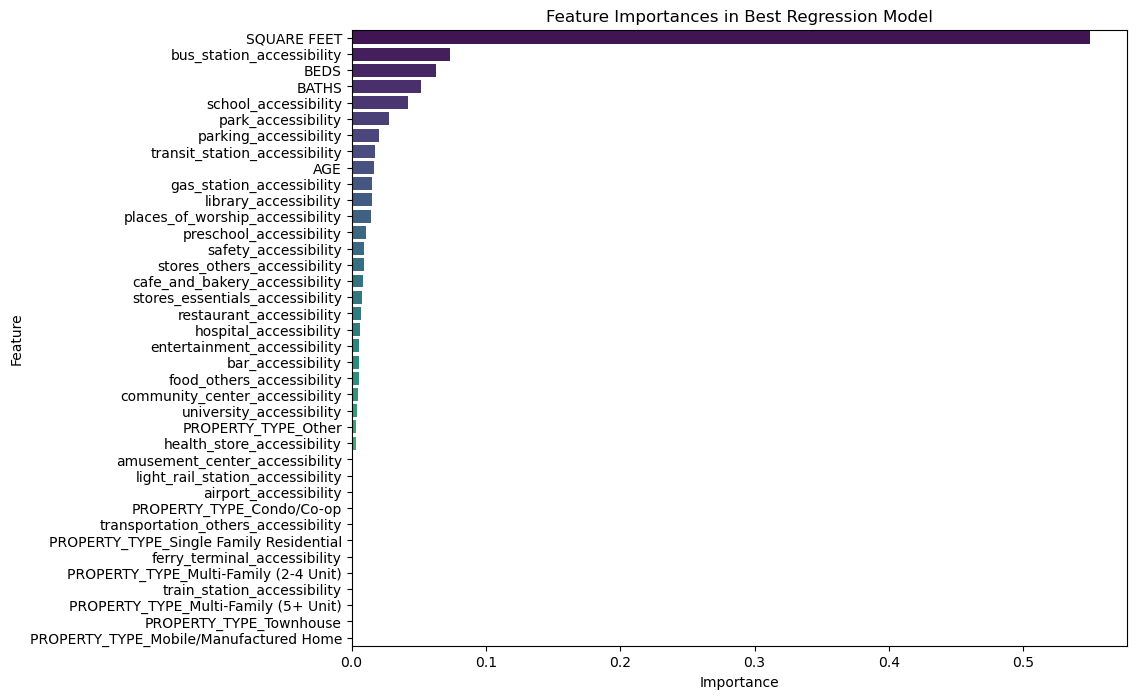

In [129]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances in Best Regression Model')
plt.show()

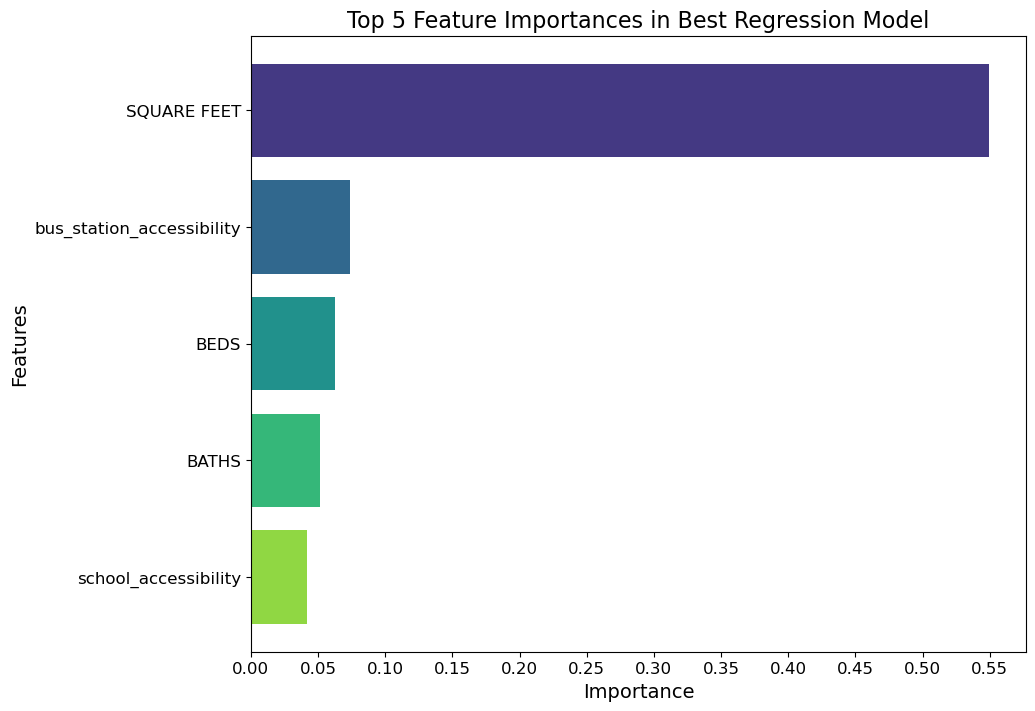

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'feature_importance' is your DataFrame sorted by importance in descending order
top_n = 5

# Select the top N features
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 8))

# Reverse the order of features and also reverse the color palette
colors = sns.color_palette("viridis", n_colors=top_n)[::-1]  # Reversing the palette
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color=colors)

# Set labels and title with increased font size
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)  # Adding y-label for clarity
plt.title(f'Top {top_n} Feature Importances in Best Regression Model', fontsize=16)

# Setting the x-axis and y-axis ticks font size
plt.xticks(ticks=np.arange(0, max_importance + 0.05, 0.05), fontsize=12)
plt.yticks(fontsize=12)

plt.show()
